<a href="https://colab.research.google.com/github/The1keyy/cs666student/blob/main/Keyshawn_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

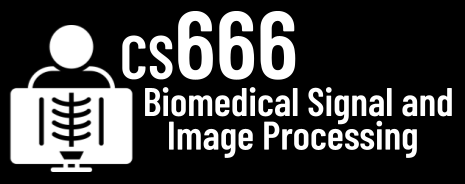

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.6 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset. Note: this might fail with an import error, but should be an easy fix :)

In [ ]:
!wget -O ecg.txt https://cs666.org/data/ecg.txt


--2026-02-18 22:55:42--  https://cs666.org/data/ecg.txt
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105085 (103K) [text/plain]
Saving to: ‘ecg.txt’

ecg.txt             100%[===================>] 102.62K  --.-KB/s    in 0.04s   

2026-02-18 22:55:42 (2.69 MB/s) - ‘ecg.txt’ saved [105085/105085]



In [ ]:
!pip install peakutils


In [ ]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
# print(metadata)

In [ ]:
SAMPLING_RATE = int(metadata["sampling_rate"])
SECONDS = len(signal) / SAMPLING_RATE

print("Sampling Rate:", SAMPLING_RATE)
print("Duration:", SECONDS)

Sampling Rate: 1000
Duration: 15.0


**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
from biosppy.signals import ecg

ts, filtered, rpeaks, templates_ts, templates, hr_ts, hr = ecg.ecg(
    signal=signal,
    sampling_rate=SAMPLING_RATE,
    show=False
)

print("Number of detected R-peaks:", len(rpeaks))


Number of detected R-peaks: 15


**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

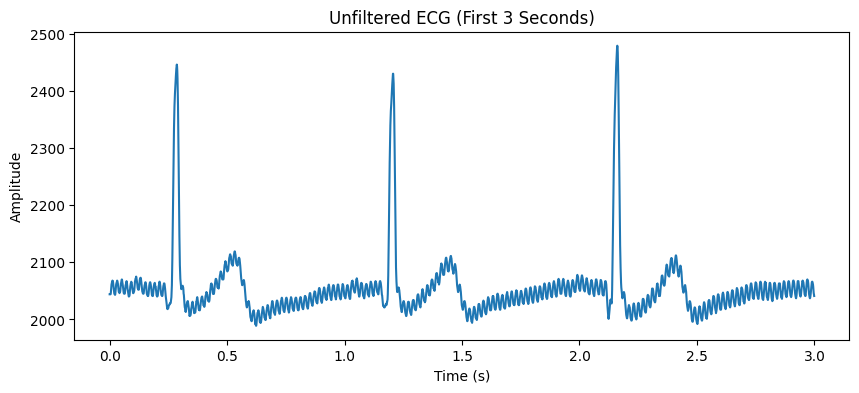

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(len(signal)) / SAMPLING_RATE  # time in seconds
mask = t < 3  # this only display the first 3 seconds

plt.figure(figsize=(10,4))
plt.plot(t[mask], signal[mask])
plt.title("Unfiltered ECG (First 3 Seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


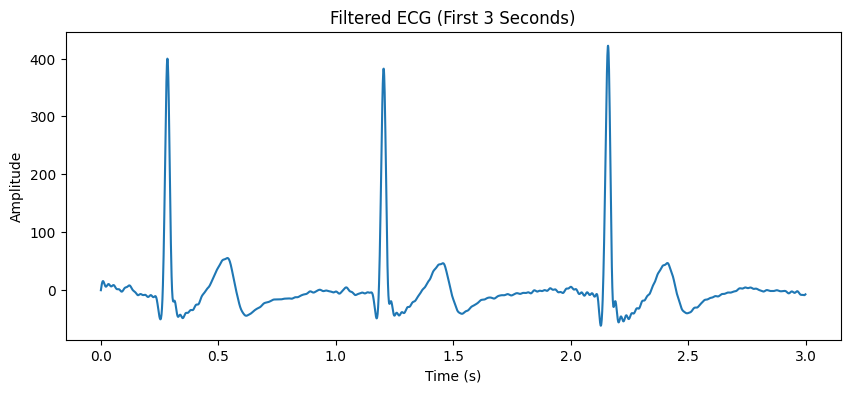

In [ ]:
mask_filtered = ts < 3

plt.figure(figsize=(10,4))
plt.plot(ts[mask_filtered], filtered[mask_filtered])
plt.title("Filtered ECG (First 3 Seconds)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

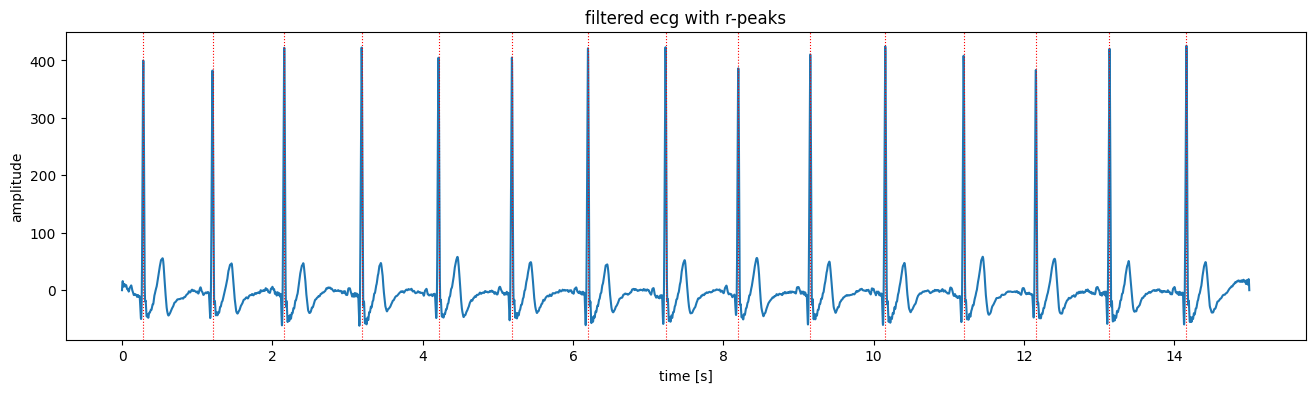

In [ ]:
import matplotlib.pyplot as plt

# plot the full filtered ecg signal
plt.figure(figsize=(16,4))
plt.plot(ts, filtered)

# add vertical lines at each detected r-peak
# rpeaks are indices so we convert them to time using ts[rp]
for rp in rpeaks:
    plt.axvline(x=ts[rp], color='r', ls=':', linewidth=0.8)

plt.title("filtered ecg with r-peaks")
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()


**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 6.5 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

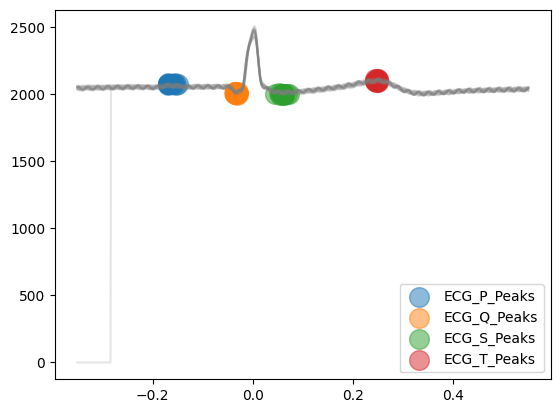

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

signal_dwt, waves_dwt = nk.ecg_delineate(
    signal,
    rpeaks,
    sampling_rate=SAMPLING_RATE,
    method="dwt",
    show=True,
    show_type="peaks"
)


In [ ]:
# TODO Does the detection work well?
# overall the qrs detection looks good.

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [ ]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/
!pip install sleepecg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 4.0 MB/s eta 0:00:00


In [ ]:
from sleepecg import detect_heartbeats
import numpy as np

rpeaks_sleep = detect_heartbeats(signal, SAMPLING_RATE)

print("biosppy rpeaks:", len(rpeaks))
print("sleepecg rpeaks:", len(rpeaks_sleep))


biosppy rpeaks: 15
sleepecg rpeaks: 15


In [ ]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!
rpeaks_sleep = np.array(rpeaks_sleep)
rpeaks_bio = np.array(rpeaks)

sq_err = []
for rp in rpeaks_bio:
    closest = rpeaks_sleep[np.argmin(np.abs(rpeaks_sleep - rp))]
    sq_err.append((rp - closest) ** 2)

mse = np.mean(sq_err)
print("mse:", mse)



mse: 0.2


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

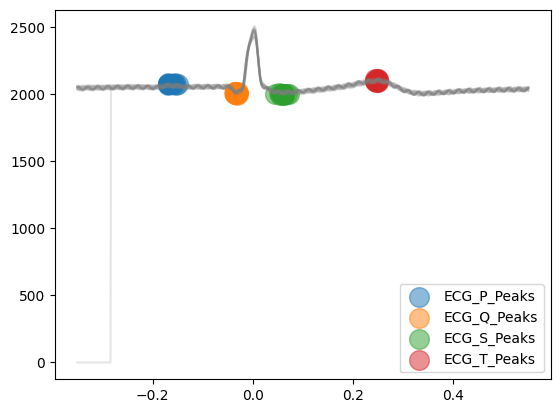

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
sig_raw, waves_raw = nk.ecg_delineate(
    signal,
    rpeaks,
    sampling_rate=SAMPLING_RATE,
    method="dwt",
    show=True,
    show_type="peaks"
)

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
# try a bandpass filter to reduce noise
signal_filtered = nk.signal_filter(
    signal,
    sampling_rate=SAMPLING_RATE,
    lowcut=0.5,
    highcut=40
)


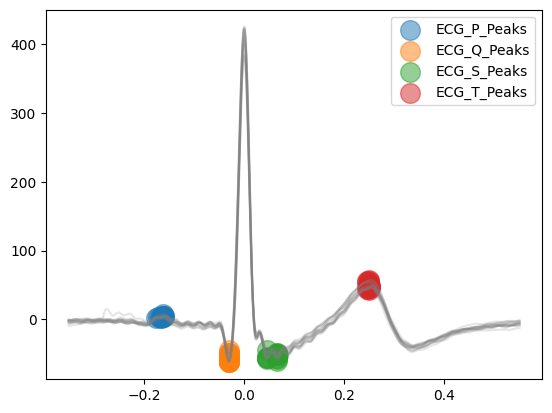

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.
sig_bio, waves_bio = nk.ecg_delineate(
    filtered,
    rpeaks,
    sampling_rate=SAMPLING_RATE,
    method="dwt",
    show=True,
    show_type="peaks"
)


In [ ]:
# TODO Which one works the best?
the secound one works best

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#